# Задание 1

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Входные данные

In [22]:
G = 6.67e-11  # гравитационная постоянная, м^3 кг^-1 с^-2
M1 = 2.0e30  # масса тела 1 (звезда), кг
M2 = 6.4e23  # масса тела 2 (планета), кг
M3 = 1.1e16 # масса астероида
R1 = 696340  # радиус солнца
R2 = 3390  # радиус тела 2 (планета), км
R12 = 228e6  # расстояние между телом 1 и телом 2, км
U2 = 24  # начальная скорость тела 2, км/с
R3 = 11.1  # радиус тела 3 (астероид), км
R23 = 9.4e3  # расстояние между телом 2 и телом 3, км
U3 = 2.14  # начальная скорость тела 3, км/с

## Начальные условия

In [23]:
x2_0 = R1 + R12 + R2  # начальное положение x тела 2
x3_0 = R1 + R12 + 2 * R2 + R23 + R3  # начальное положение x тела 3
y2_0 = 0  # начальное положение y тела 2
y3_0 = 0  # начальное положение y тела 3

vx2_0 = 0  # начальная скорость по x тела 2
vx3_0 = 0  # начальная скорость по x тела 3
vy2_0 = U2  # начальная скорость по y тела 2
vy3_0 = U3 + U2  # начальная скорость по y тела 3

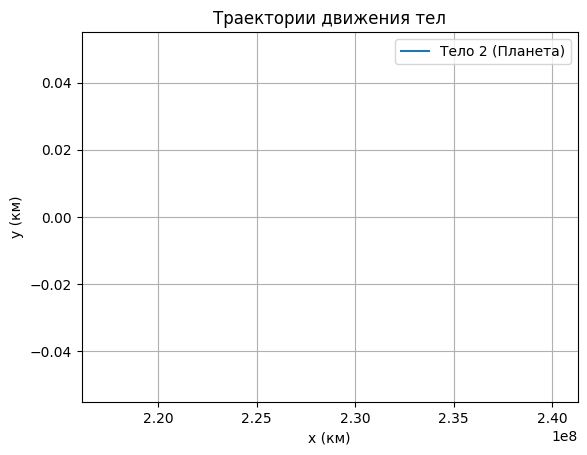

In [49]:
# Функция для расчета расстояний между телами
def r12(x2, y2):
    return np.sqrt(x2 ** 2 + y2 ** 2)


def r13(x3, y3):
    return np.sqrt(x3 ** 2 + y3 ** 2)


def r23(x2, y2, x3, y3):
    return np.sqrt((x3 - x2) ** 2 + (y3 - y2) ** 2)


# Определим систему уравнений
def system(t, y):
    x2, vx2, y2, vy2, x3, vx3, y3, vy3 = y

    # Расстояния между телами
    r_12 = r12(x2, y2)
    r_13 = r13(x3, y3)
    r_23 = r23(x2, y2, x3, y3)

    # Уравнения движения
    ax2 = G * M1 * (-x2) / r_12 ** 1.5 + G * M3 * (x3 - x2) / r_23 ** 1.5
    ay2 = G * M1 * (-y2) / r_12 ** 1.5 + G * M3 * (y3 - y2) / r_23 ** 1.5

    ax3 = G * M1 * (-x3) / r_13 ** 1.5 + G * M2 * (x2 - x3) / r_23 ** 1.5
    ay3 = G * M1 * (-y3) / r_13 ** 1.5 + G * M2 * (y2 - y3) / r_23 ** 1.5
    
    # print([vx2, ax2, vy2, ay2, vx3, ax3, vy3, ay3])

    return [vx2, ax2, vy2, ay2, vx3, ax3, vy3, ay3]


# Начальные условия для решения системы
y0 = [x2_0, vx2_0, y2_0, vy2_0, x3_0, vx3_0, y3_0, vy3_0]

# Временной интервал интегрирования
t_span = (0, 1e7)  # от 0 до 10 миллионов секунд

# Решение системы методом Рунге-Кутты
sol = solve_ivp(system, t_span, y0, method='RK5')

# Построим графики
plt.scatter(sol.y[0][0], sol.y[2][0], label='Тело 2 (Планета)')
# plt.plot(sol.y[4], sol.y[6], label='Тело 3 (Астероид)')
plt.xlabel('x (км)')
plt.ylabel('y (км)')
plt.legend()
plt.title('Траектории движения тел')
plt.grid()
plt.show()



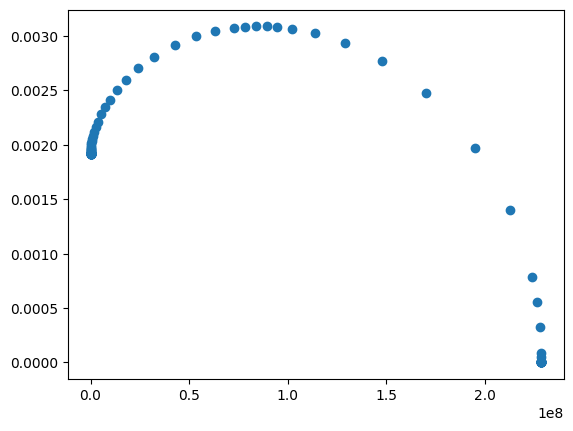

In [66]:
plt.scatter(sol.y[0][0:100], sol.y[2][0:100], label='Тело 2 (Планета)')
# plt.scatter(sol.y[4][0:200], sol.y[6][0:200], label='Тело 3 (Астероид)')

In [38]:
sol.y

array([[ 2.28699730e+08,  2.28699730e+08,  2.28699730e+08, ...,
         1.50156910e+10,  3.29795230e+10,  3.91566664e+10],
       [ 0.00000000e+00, -1.41417485e-03, -1.55559234e-02, ...,
         9.21230920e+12,  7.30390102e+12,  6.68289942e+12],
       [ 0.00000000e+00,  3.84761269e-18,  4.23237395e-17, ...,
         1.08525039e+03,  2.38357596e+03,  2.83002543e+03],
       ...,
       [ 0.00000000e+00, -1.41419576e-03, -1.55561534e-02, ...,
         4.47438524e+12,  5.58403369e+12,  6.06040759e+12],
       [ 0.00000000e+00,  4.19069148e-18,  4.60976063e-17, ...,
        -2.04688913e+04, -1.74579895e+04, -1.60506568e+04],
       [ 2.61400000e+01,  2.61400000e+01,  2.61400000e+01, ...,
         1.22405668e+06,  1.52759154e+06,  1.65789806e+06]])

In [40]:
sol.y['0']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices